In [268]:
# Libraries

import scipy.interpolate
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas import *

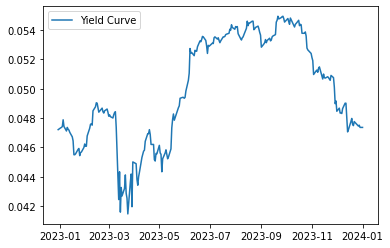

Date,Yield
2022-12-30 00:00:00,0.0472193000
2023-01-02 00:00:00,0.047332
2023-01-03 00:00:00,0.0473701000
2023-01-04 00:00:00,0.0474131000
2023-01-05 00:00:00,0.0478778000
2023-01-06 00:00:00,0.0474216000
2023-01-09 00:00:00,0.0471151000
2023-01-10 00:00:00,0.0473679000
2023-01-11 00:00:00,0.0472474000
2023-01-12 00:00:00,0.0471745000


In [269]:
# yield curve is downloaded from Back of Canada
# https://www.bankofcanada.ca/rates/interest-rates/bond-yield-curves/
yc_raw = read_csv('yield_curves.csv', index_col=None, parse_dates=['Date'])
# print(yc.columns)

# Task 1: Interpolate Missing Daily Rates
yc_1yr = pd.DataFrame(data={'Date': yc_raw.Date, 'Yield': yc_raw.loc[:," ZC100YR"]})  # Extract 1-year yield curve and create a new dataframe


i_prev = 0
i_next = 0
for i in range(len(yc_1yr.Date)):
    
    # determine interpolation points Y1 and Y2
    if i<len(yc_1yr.Date)-1:
        i_next = i+1
        if yc_1yr.loc[i,'Yield'] == ' na' and yc_1yr.loc[i+1,'Yield'] == ' na': # edge case1: missing two consicutive yields
            i_next = i+2         
    else: i_next = i_prev # edge case2: the last yield is missing
    
    # Y = Y1 + (Y2-Y1)*(X-X1)/(X2-X1)
    if yc_1yr.loc[i,'Yield'] == ' na':
        if i_prev == i_next: # edge case2: the last yield is missing
            yc_1yr.loc[i,'Yield'] = yc_1yr.loc[i_prev,'Yield']
        else: # interpolation
            itpl = math.prod([(float(yc_1yr.loc[i_next,'Yield']) - float(yc_1yr.loc[i_prev,'Yield'])),
                              float((yc_1yr.loc[i,'Date'] - yc_1yr.loc[i_prev,'Date']).days),
                              1/float((yc_1yr.loc[i_next,'Date'] - yc_1yr.loc[i_prev,'Date']).days)])
            yc_1yr.loc[i,'Yield'] = float(yc_1yr.loc[i_prev,'Yield']) + itpl 
            
    else:
        i_prev=i

        
# Display Yield Curve
plt.plot(yc_1yr.Date, yc_1yr.Yield.astype(np.float16) ) 
plt.legend(['Yield Curve'])
plt.show()
        
display(yc_1yr.style.hide_index()) 


Monthly Spot Rate: [0.0462262 0.0483983 0.0449845 0.0455671 0.0493554 0.0528741 0.0540324
 0.0536453 0.0545456 0.0523927 0.0491664 0.0473755]


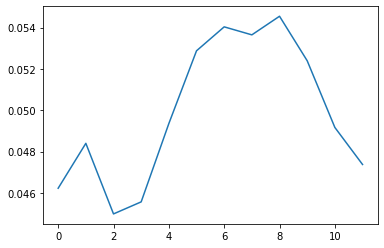

In [298]:
# Task 2: Use yield rate of the last day of each month as the monthly yield curve


YC = np.zeros(12)


j = 0
for i in range(len(yc_1yr.Date)):
    if i == len(yc_1yr.Date)-1:
        YC[-1] = yc_1yr.loc[i,'Yield']
    elif yc_1yr.loc[i,'Date'].month < yc_1yr.loc[i+1,'Date'].month:
        YC[j] = yc_1yr.loc[i,'Yield']
        j = j+1
    
print("Monthly Spot Rate:",YC)

plt.plot(YC)


Monthly Forward Rate: [0.0462262  0.04731169 0.04653538 0.04629323 0.04690495 0.04789745
 0.04877168 0.04937965 0.04995239 0.05019617 0.05010251 0.04987499]


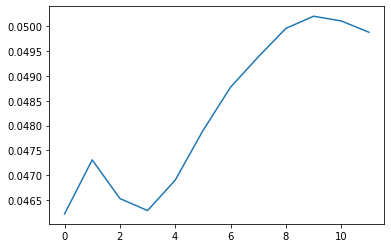

In [299]:
# Task 3: spot rate to forward rates

acc = 1

FWD = np.zeros(12)

for j in range(len(YC)):
    acc = acc*(1+YC[j])**(1/12)
    FWD[j] = acc**(12/(j+1))-1
    
print("Monthly Forward Rate:", FWD)

plt.plot(FWD)
